# Importing dependencies

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Rescaling
from keras.models import Model

In [ ]:
#seeting seed for uniform randomization
tf.random.set_seed(1234)

In [ ]:
from keras.layers import Input, Dense, Flatten, Rescaling, Conv2D, MaxPooling2D, Activation, BatchNormalization
import tensorflow_probability as tfp

#Base Model

In [ ]:
base_model = keras.applications.ResNet50V2(
    input_shape = (224,224,3),
    include_top = False,)

base_model.trainable = False

In [ ]:
# tf.keras.utils.plot_model(base_model)

# Identifying Conv Layers in the last 50 layers

In [ ]:
conv_layers = []
for i in range(144, 190):
  if base_model.layers[i].__class__ == Conv2D:
    print(f"[{i}] - {base_model.layers[i].name}")
    conv_layers.append(i)
print(len(conv_layers))

[144] - conv4_block6_1_conv
[148] - conv4_block6_2_conv
[152] - conv4_block6_3_conv
[156] - conv5_block1_1_conv
[160] - conv5_block1_2_conv
[163] - conv5_block1_0_conv
[164] - conv5_block1_3_conv
[168] - conv5_block2_1_conv
[172] - conv5_block2_2_conv
[175] - conv5_block2_3_conv
[179] - conv5_block3_1_conv
[183] - conv5_block3_2_conv
[186] - conv5_block3_3_conv
13


In [ ]:
# tf.keras.utils.plot_model(base_model)

#Making Probabilistic layers

In [ ]:
def kl_divergence_function(q, p, _):
    return tfp.distributions.kl_divergence(q, p) / tf.cast(874, dtype=tf.float32)

conv_layers_prob = []
for i in conv_layers:
  config = base_model.layers[i].get_config()
  conv_layers_prob.append(tfp.layers.Convolution2DFlipout(config["filters"], config["kernel_size"],
                                                          config["strides"], config["padding"],
                                                          kernel_divergence_fn=kl_divergence_function,
                                                          bias_divergence_fn=kl_divergence_function,
                                                          name = config["name"] + "_prob"))
print(len(conv_layers_prob))

13


# Deterministic to Probilistic

In [ ]:
#conv4_block6
output_143 = base_model.layers[143].output #conv4_block6_preact_relu
output_151 = base_model.layers[151].output #max_pooling2d_5
x = conv_layers_prob[0](output_143)
print(x)

count = 1
for i in range(145, 153):
  if i == 151:
    continue
  if i == conv_layers[count]:
    if count < 3:
      x = conv_layers_prob[count](x)
      count = count + 1
  else:
    x = base_model.layers[i](x)
  print(x)

# print(x)
x = base_model.layers[153]([x, output_151])
print(x)

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 256), dtype=tf.float32, name=None), name='conv4_block6_1_conv_prob/BiasAdd:0', description="created by layer 'conv4_block6_1_conv_prob'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 256), dtype=tf.float32, name=None), name='conv4_block6_1_bn/FusedBatchNormV3:0', description="created by layer 'conv4_block6_1_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 256), dtype=tf.float32, name=None), name='conv4_block6_1_relu/Relu:0', description="created by layer 'conv4_block6_1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv4_block6_2_pad/Pad:0', description="created by layer 'conv4_block6_2_pad'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 256), dtype=tf.float32, name=None), name='conv4_block6_2_conv_prob/BiasAdd:0', description="created by layer 'conv4_block6_2_conv_prob'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 256), dtype=tf.float32, 

In [ ]:
output_154 = base_model.layers[154](x)
print(output_154)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1024), dtype=tf.float32, name=None), name='conv5_block1_preact_bn/FusedBatchNormV3:0', description="created by layer 'conv5_block1_preact_bn'")


In [ ]:
#conv5_block_1
output_155 = base_model.layers[155](output_154) #conv5_block1_preact_relu
print(output_155)
x = conv_layers_prob[3](output_155) #conv5_block1_1_conv_prob
output_163 = conv_layers_prob[5](output_155) #conv5_block1_0_conv_prob
print(x)

count = 4
for i in range(157, 165):
  if i == 163:
    count = count + 1
    continue
  if i == conv_layers[count]:
    if count < 7:
      x = conv_layers_prob[count](x)
      count = count + 1
  else:
    x = base_model.layers[i](x)
  print(x)

output_165 = base_model.layers[165]([x, output_163])
print(output_165)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1024), dtype=tf.float32, name=None), name='conv5_block1_preact_relu/Relu:0', description="created by layer 'conv5_block1_preact_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block1_1_conv_prob/BiasAdd:0', description="created by layer 'conv5_block1_1_conv_prob'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block1_1_bn/FusedBatchNormV3:0', description="created by layer 'conv5_block1_1_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block1_1_relu/Relu:0', description="created by layer 'conv5_block1_1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 9, 9, 512), dtype=tf.float32, name=None), name='conv5_block1_2_pad/Pad:0', description="created by layer 'conv5_block1_2_pad'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None)

In [ ]:
#conv5_block_2
x = base_model.layers[166](output_165) #conv5_block2_preact_bn
print(x)
count = 7
for i in range(167, 176):
  if i == conv_layers[count]:
    if count < 10:
      x = conv_layers_prob[count](x)
      count = count + 1
  else:
    x = base_model.layers[i](x)
  print(x)

output_176 = base_model.layers[176]([x, output_165])
print(output_176)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block2_preact_bn/FusedBatchNormV3:0', description="created by layer 'conv5_block2_preact_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block2_preact_relu/Relu:0', description="created by layer 'conv5_block2_preact_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block2_1_conv_prob/BiasAdd:0', description="created by layer 'conv5_block2_1_conv_prob'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block2_1_bn/FusedBatchNormV3:0', description="created by layer 'conv5_block2_1_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block2_1_relu/Relu:0', description="created by layer 'conv5_block2_1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 9, 9, 512), dtype=

In [ ]:
#conv5_block_3
x = base_model.layers[177](output_176) #conv5_block3_preact_bn
print(x)
count = 10
for i in range(178, 187):
  if i == conv_layers[count]:
    if count < 13:
      x = conv_layers_prob[count](x)
      count = count + 1
  else:
    x = base_model.layers[i](x)
  print(x)

output_187 = base_model.layers[187]([x, output_176])
print(output_187)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_preact_bn/FusedBatchNormV3:0', description="created by layer 'conv5_block3_preact_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_preact_relu/Relu:0', description="created by layer 'conv5_block3_preact_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block3_1_conv_prob/BiasAdd:0', description="created by layer 'conv5_block3_1_conv_prob'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block3_1_bn/FusedBatchNormV3:0', description="created by layer 'conv5_block3_1_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='conv5_block3_1_relu/Relu:0', description="created by layer 'conv5_block3_1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 9, 9, 512), dtype=

In [ ]:
#post_block
output_188 = base_model.layers[188](output_187) #post_bn
print(output_188)
output_189 = base_model.layers[189](output_188) #post_relu
print(output_189)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='post_bn/FusedBatchNormV3:0', description="created by layer 'post_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='post_relu/Relu:0', description="created by layer 'post_relu'")


In [ ]:
base_model_50 = Model(inputs = base_model.input, outputs = output_189, name = "base_model_50")

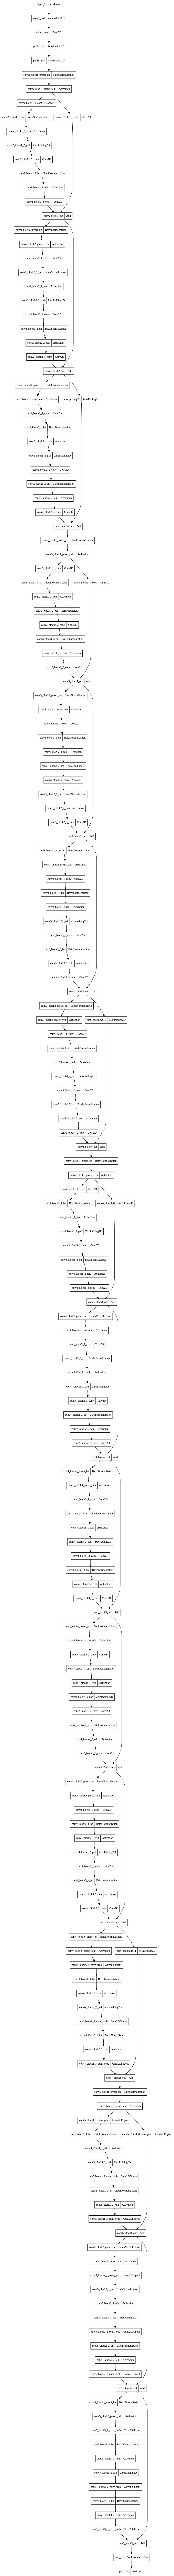

In [ ]:
tf.keras.utils.plot_model(base_model_50)

In [ ]:
for i in range(len(base_model_50.layers)):
  # print(f"[{i}] - {base_model_50.layers[i].trainable}")
  if base_model_50.layers[i].trainable:
    print(f"[{i}] - {base_model_50.layers[i].name}")

[144] - conv4_block6_1_conv_prob
[148] - conv4_block6_2_conv_prob
[151] - conv4_block6_3_conv_prob
[156] - conv5_block1_1_conv_prob
[160] - conv5_block1_2_conv_prob
[163] - conv5_block1_3_conv_prob
[164] - conv5_block1_0_conv_prob
[168] - conv5_block2_1_conv_prob
[172] - conv5_block2_2_conv_prob
[175] - conv5_block2_3_conv_prob
[179] - conv5_block3_1_conv_prob
[183] - conv5_block3_2_conv_prob
[186] - conv5_block3_3_conv_prob


# initialize 10 models

In [ ]:
def find_conv_layers(base_model, depth = 46):
  conv_layers = []
  for i in range(190-depth, 190):
    if base_model.layers[i].__class__ == tf.keras.layers.Conv2D:
      # print(f"[{i}] - {base_model.layers[i].name}")
      conv_layers.append(i)
  # print(len(conv_layers))
  return conv_layers

In [ ]:
find_conv_layers(base_model)

[144, 148, 152, 156, 160, 163, 164, 168, 172, 175, 179, 183, 186]

In [ ]:
def make_prob_layers(base_model, conv_layers):
  def kl_divergence_function(q, p, _):
    return tfp.distributions.kl_divergence(q, p) / tf.cast(874, dtype=tf.float32)

  conv_layers_prob = []
  for i in conv_layers:
    config = base_model.layers[i].get_config()
    conv_layers_prob.append(tfp.layers.Convolution2DFlipout(config["filters"], config["kernel_size"],
                                                            config["strides"], config["padding"],
                                                            kernel_divergence_fn=kl_divergence_function,
                                                            bias_divergence_fn=kl_divergence_function,
                                                            name = config["name"] + "_prob"))
  # print(len(conv_layers_prob))
  return conv_layers_prob

In [ ]:
# make_prob_layers(base_model, conv_layers)

In [ ]:
#the following fucntion is specifically designed from conv4_block6 to conv5_block3
def make_prob_model(verbose = 1, input_shape = (250, 700, 3)):
  #get original base_model
  try: del base_model
  except: print("base_model not found")
  base_model = keras.applications.ResNet50V2(
      input_shape = input_shape,
      include_top = False)
  base_model.trainable = False

  #config base_model
  conv_layers = find_conv_layers(base_model)
  # conv_layers = conv_layers[1:] #only using conv4_block6 to conv5_block3
  conv_layers_prob = make_prob_layers(base_model, conv_layers)

  #conv4_block6
  output_143 = base_model.layers[143].output #conv4_block6_preact_relu
  output_151 = base_model.layers[151].output #max_pooling2d_5
  x = conv_layers_prob[0](output_143)
  if verbose: print(x)

  count = 1
  for i in range(145, 153):
    if i == 151:
      continue
    if i == conv_layers[count]:
      if count < 3:
        x = conv_layers_prob[count](x)
        count = count + 1
    else:
      x = base_model.layers[i](x)
    if verbose: print(x)

  x = base_model.layers[153]([x, output_151])
  if verbose: print(x)
#------------------------------------------------------------
  output_154 = base_model.layers[154](x)
  if verbose: print(output_154)
#------------------------------------------------------------
  #conv5_block_1
  output_155 = base_model.layers[155](output_154) #conv5_block1_preact_relu
  if verbose: print(output_155)
  x = conv_layers_prob[3](output_155) #conv5_block1_1_conv_prob
  output_163 = conv_layers_prob[5](output_155) #conv5_block1_0_conv_prob
  if verbose: print(x)

  count = 4
  for i in range(157, 165):
    if i == 163:
      count = count + 1
      continue
    if i == conv_layers[count]:
      if count < 7:
        x = conv_layers_prob[count](x)
        count = count + 1
    else:
      x = base_model.layers[i](x)
    if verbose: print(x)

  output_165 = base_model.layers[165]([x, output_163])
  if verbose: print(output_165)
#------------------------------------------------------------
  #conv5_block_2
  x = base_model.layers[166](output_165) #conv5_block2_preact_bn
  if verbose: print(x)
  count = 7
  for i in range(167, 176):
    if i == conv_layers[count]:
      if count < 10:
        x = conv_layers_prob[count](x)
        count = count + 1
    else:
      x = base_model.layers[i](x)
    if verbose: print(x)

  output_176 = base_model.layers[176]([x, output_165])
  if verbose: print(output_176)
#------------------------------------------------------------
  #conv5_block_3
  x = base_model.layers[177](output_176) #conv5_block3_preact_bn
  if verbose: print(x)
  count = 10
  for i in range(178, 187):
    if i == conv_layers[count]:
      if count < 13:
        x = conv_layers_prob[count](x)
        count = count + 1
    else:
      x = base_model.layers[i](x)
    if verbose: print(x)

  output_187 = base_model.layers[187]([x, output_176])
  if verbose: print(output_187)
#------------------------------------------------------------
  #post_block
  output_188 = base_model.layers[188](output_187) #post_bn
  if verbose: print(output_188)
  output_189 = base_model.layers[189](output_188) #post_relu
  if verbose: print(output_189)
#------------------------------------------------------------
  base_model_50 = Model(inputs = base_model.input, outputs = output_189, name = "base_model_50")
  return base_model_50, conv_layers_prob

In [ ]:
def renew_base_model(input_shape, verbose):
  global base_model
  try:
    del base_model
  except:
    if verbose != 0:
      print("base_model not found")

  base_model = keras.applications.ResNet50V2(input_shape = input_shape, include_top = False)
  return base_model

In [ ]:
def create_model_tfp_base(classes, activation, base, input_shape, name, lr, prior = None, posterior = None):
  inputs = keras.Input(shape = input_shape)
  #normalizing pixel values
  x = Rescaling(scale = 1./255)(inputs)
  x = base(x)
  x = keras.layers.GlobalAveragePooling2D()(x)
  outputs = keras.layers.Dense(classes,activation = activation)(x)
  model = keras.Model(inputs, outputs, name = name)

  loss_s = keras.losses.CategoricalCrossentropy()

  model.compile(
      loss = loss_s,
      optimizer = keras.optimizers.Adam(lr),
      metrics = ["accuracy"]
  )

  return model

In [ ]:
#initialize deteministic models with weights sampled from the probabilistic model
def initialize_10_models(model_full, input_shape, verbose, conv_layers_prob):
  models = []
  for k in range(10):
    base = renew_base_model(input_shape, verbose)
    models.append(create_model_tfp_base(4, "softmax", base, input_shape, name = (f"model_{model_full.name}_d" + str(k)), lr = 0.0001))
    if verbose != 0:
      print(f"initializing model[{k}] = {models[k].name}")

    for i in range(len(models[k].layers)):
      if verbose != 0:
        print(f"layer[{i}]: {model_full.layers[i].name} => {models[k].layers[i].name}")

      if model_full.layers[i].name == "base_model_50":
        count = 0
        for j in range(len(models[k].layers[i].layers)):
          if j == 152:
            if verbose != 0: print("-- skipping 152 --")
            continue
          if j == 164:
            if verbose != 0: print("-- skipping 164 --")
            continue
          #prob model has conv4_block6_3_conv_prob at 151 and deter model has conv4_block6_3_conv at 152
          if j == 151:
            #setting weights of conv4_block6_3_conv[at 152]
            kernel = model_full.layers[i].layers[j].kernel_posterior.sample()
            bias = model_full.layers[i].layers[j].bias_posterior.sample()
            models[k].layers[i].layers[152].set_weights(list([kernel, bias]))
            count = count + 1
            if verbose != 0: print(f"[{j}] - conv_layer_prob: {conv_layers_prob[count].name} => [152] - {models[k].layers[i].layers[152].name}")
            continue

          #prob model has conv5_block1_3_conv_prob at 163 and deter model has conv5_block1_0_conv at 164
          #prob model has conv5_block1_0_conv_prob at 164 and deter model has conv5_block1_3_conv at 163
          if j == 163:
            #setting weights of conv5_block1_3_conv[at 164]
            kernel = model_full.layers[i].layers[j].kernel_posterior.sample()
            bias = model_full.layers[i].layers[j].bias_posterior.sample()
            models[k].layers[i].layers[164].set_weights(list([kernel, bias]))
            count = count + 1
            if verbose != 0: print(f"[{j}] - conv_layer_prob: {conv_layers_prob[count].name} => [164] - {models[k].layers[i].layers[152].name}")
            #setting weights of conv5_block1_0_conv[at 163]
            kernel = model_full.layers[i].layers[164].kernel_posterior.sample()
            bias = model_full.layers[i].layers[164].bias_posterior.sample()
            models[k].layers[i].layers[j].set_weights(list([kernel, bias]))
            count = count + 1
            if verbose != 0: print(f"[164] - conv_layer_prob: {conv_layers_prob[count].name} => [163] - {models[k].layers[i].layers[152].name}")
            continue

            #setting weights of max_pooling2d_8[at 151]
            models[k].layers[i].layers[j].set_weights(model_full.layers[i].layers[152].get_weights())
            if verbose != 0: print(f"[151] - base_model.layers - {base_model.layers[151].name} = weights_set")
            continue

          if count < len(conv_layers_prob) and model_full.layers[i].layers[j].name == conv_layers_prob[count].name:
            if verbose != 0: print(f"[{j}] - conv_layer_prob: {conv_layers_prob[count].name} => {models[k].layers[i].layers[j].name}")
            count = count + 1

            #sampling kernel
            kernel = model_full.layers[i].layers[j].kernel_posterior.sample()
            #sampling bias
            if models[k].layers[i].layers[j].get_config()['use_bias']:
              bias = model_full.layers[i].layers[j].bias_posterior.sample()
              models[k].layers[i].layers[j].set_weights(list([kernel, bias]))
            else:
              models[k].layers[i].layers[j].set_weights(list([kernel]))

            #deleting kernel and bias
            del kernel
            if models[k].layers[i].layers[j].get_config()['use_bias']: del bias
          else:
            models[k].layers[i].layers[j].set_weights(model_full.layers[i].layers[j].get_weights())
      else:
        models[k].layers[i].set_weights(model_full.layers[i].get_weights())
    if verbose != 0:
      print()
  print(f"models for {model_full.name} initialized")
  return models

In [ ]:
base_model_50, conv_layers_prob = make_prob_model()

base_model not found


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


KerasTensor(type_spec=TensorSpec(shape=(None, 16, 44, 256), dtype=tf.float32, name=None), name='conv4_block6_1_conv_prob/BiasAdd:0', description="created by layer 'conv4_block6_1_conv_prob'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 44, 256), dtype=tf.float32, name=None), name='conv4_block6_1_bn/FusedBatchNormV3:0', description="created by layer 'conv4_block6_1_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 44, 256), dtype=tf.float32, name=None), name='conv4_block6_1_relu/Relu:0', description="created by layer 'conv4_block6_1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 18, 46, 256), dtype=tf.float32, name=None), name='conv4_block6_2_pad/Pad:0', description="created by layer 'conv4_block6_2_pad'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 22, 256), dtype=tf.float32, name=None), name='conv4_block6_2_conv_prob/BiasAdd:0', description="created by layer 'conv4_block6_2_conv_prob'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 22, 256), dtype=tf.float32

In [ ]:
model_full = create_model_tfp_base(4, "softmax", base_model_50, (250, 700, 3), name = ("model_full"), lr = 0.0001)

In [ ]:
initialize_10_models(model_full, (250, 700, 3), 1, conv_layers_prob)

initializing model[0] = model_model_full_d0
layer[0]: input_3 => input_5
layer[1]: rescaling => rescaling_1
layer[2]: base_model_50 => resnet50v2
[144] - conv_layer_prob: conv4_block6_1_conv_prob => conv4_block6_1_conv
[148] - conv_layer_prob: conv4_block6_2_conv_prob => conv4_block6_2_conv
[151] - conv_layer_prob: conv5_block1_1_conv_prob => [152] - conv4_block6_3_conv
-- skipping 152 --
[156] - conv_layer_prob: conv5_block1_1_conv_prob => conv5_block1_1_conv
[160] - conv_layer_prob: conv5_block1_2_conv_prob => conv5_block1_2_conv
[163] - conv_layer_prob: conv5_block1_3_conv_prob => [164] - conv4_block6_3_conv
[164] - conv_layer_prob: conv5_block2_1_conv_prob => [163] - conv4_block6_3_conv
-- skipping 164 --
[168] - conv_layer_prob: conv5_block2_1_conv_prob => conv5_block2_1_conv
[172] - conv_layer_prob: conv5_block2_2_conv_prob => conv5_block2_2_conv
[175] - conv_layer_prob: conv5_block2_3_conv_prob => conv5_block2_3_conv
[179] - conv_layer_prob: conv5_block3_1_conv_prob => conv5_blo

In [ ]:
# base_model.layers[186].get_config()['use_bias']
for i in range(len(base_model.layers)-48, len(base_model.layers)):
  if base_model.layers[i].__class__ == tf.keras.layers.Conv2D:
    print(f"[{i}] - {base_model.layers[i].name} = {base_model.layers[i].get_config()['use_bias']}")

[144] - conv4_block6_1_conv = False
[148] - conv4_block6_2_conv = False
[152] - conv4_block6_3_conv = True
[156] - conv5_block1_1_conv = False
[160] - conv5_block1_2_conv = False
[163] - conv5_block1_0_conv = True
[164] - conv5_block1_3_conv = True
[168] - conv5_block2_1_conv = False
[172] - conv5_block2_2_conv = False
[175] - conv5_block2_3_conv = True
[179] - conv5_block3_1_conv = False
[183] - conv5_block3_2_conv = False
[186] - conv5_block3_3_conv = True


In [ ]:
for i in range(len(base_model.layers)-48, len(base_model.layers)):
  print(f"[{i}] - {base_model_50.layers[i].name} - {base_model.layers[i].name}")

[142] - conv4_block6_preact_bn - conv4_block6_preact_bn
[143] - conv4_block6_preact_relu - conv4_block6_preact_relu
[144] - conv4_block6_1_conv_prob - conv4_block6_1_conv
[145] - conv4_block6_1_bn - conv4_block6_1_bn
[146] - conv4_block6_1_relu - conv4_block6_1_relu
[147] - conv4_block6_2_pad - conv4_block6_2_pad
[148] - conv4_block6_2_conv_prob - conv4_block6_2_conv
[149] - conv4_block6_2_bn - conv4_block6_2_bn
[150] - conv4_block6_2_relu - conv4_block6_2_relu
[151] - conv4_block6_3_conv_prob - max_pooling2d_8
[152] - max_pooling2d_2 - conv4_block6_3_conv
[153] - conv4_block6_out - conv4_block6_out
[154] - conv5_block1_preact_bn - conv5_block1_preact_bn
[155] - conv5_block1_preact_relu - conv5_block1_preact_relu
[156] - conv5_block1_1_conv_prob - conv5_block1_1_conv
[157] - conv5_block1_1_bn - conv5_block1_1_bn
[158] - conv5_block1_1_relu - conv5_block1_1_relu
[159] - conv5_block1_2_pad - conv5_block1_2_pad
[160] - conv5_block1_2_conv_prob - conv5_block1_2_conv
[161] - conv5_block1_2_

#Last Conv2D into Conv2DFlipout

In [ ]:
def kl_divergence_function(q, p, _):
    return tfp.distributions.kl_divergence(q, p) / tf.cast(874, dtype=tf.float32)

input = Input((7,7,512), name = "Input_Layer")
x = tfp.layers.Convolution2DFlipout(2048, (1,1), (1,1), 'valid',
                                    kernel_divergence_fn=kl_divergence_function,
                                    bias_divergence_fn=kl_divergence_function,
                                    name = "Conv2D_Flipout")(input)

# x = Conv2D(2048, (1,1), (1,1), 'valid', name = "Conv2D_Flipout")(input)

x = Flatten(name = "Flatten")(x)
output = Dense(2, 'softmax', name = "Softmax")(x)

model_prob = Model(inputs = input, outputs = output)

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


In [ ]:
print(base_model.layers[187].name)
print(base_model.layers[186].name)
print(base_model.layers[185].name)

conv5_block3_out
conv5_block3_3_conv
conv5_block3_2_relu


In [ ]:
base_model.layers[176].name

'conv5_block2_out'

In [ ]:
output_185 = base_model.layers[185].output
output_176 = base_model.layers[176].output
conv_2D_flipout_186 = tfp.layers.Convolution2DFlipout(2048, (1,1), (1,1), 'valid',
                                    kernel_divergence_fn=kl_divergence_function,
                                    bias_divergence_fn=kl_divergence_function,
                                    name = "Conv2D_Flipout_186")
x = conv_2D_flipout_186(output_185)

for layer in base_model.layers[187:]:
  if layer.name == "conv5_block3_out":
    x = layer([x, output_176])
  else:
    x = layer(x)

n_model = Model(inputs = base_model.input, outputs = x)

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


In [ ]:
cf_n = n_model.get_config()
cf = base_model.get_config()

In [ ]:
print(len(cf_n))
print(len(cf))

5
5


In [ ]:
# cf_n = list(cf_n.items())
# cf = list(cf.items())

In [ ]:
keys = list(cf.keys())
keys

['name', 'trainable', 'layers', 'input_layers', 'output_layers']

In [ ]:
for i in keys:
  print(cf_n[i] == cf[i])

False
False
False
True
True


In [ ]:
print(keys[-1])
print(cf_n[keys[-1]])
print(cf[keys[-1]])

output_layers
[['post_relu', 0, 0]]
[['post_relu', 0, 0]]


In [ ]:
print(keys[-2])
print(cf_n[keys[-2]])
print(cf[keys[-2]])

input_layers
[['input_1', 0, 0]]
[['input_1', 0, 0]]


In [ ]:
keys[-3]

'layers'

In [ ]:
layers = cf[keys[-3]]
layers_n = cf_n[keys[-3]]

In [ ]:
for i in range(len(layers_n)):
  if not (layers[i] == layers_n[i]):
    print(i)
    print(base_model.layers[i].name)
    print(n_model.layers[i].name)
    print()

186
conv5_block3_3_conv
Conv2D_Flipout_186

187
conv5_block3_out
conv5_block3_out



In [ ]:
keys_l_186 = list(cf['layers'][186].keys())
keys_l_186

['module',
 'class_name',
 'config',
 'registered_name',
 'build_config',
 'name',
 'inbound_nodes']

In [ ]:
for i in keys_l_186:
  print(i, end = ": ")
  print(cf['layers'][186][i] == cf_n['layers'][186][i])

module: False
class_name: False
config: False
registered_name: False
build_config: True
name: False
inbound_nodes: True


In [ ]:
keys_l_186_config = list(cf['layers'][186]['config'].keys())
keys_l_186_config

['name',
 'trainable',
 'dtype',
 'filters',
 'kernel_size',
 'strides',
 'padding',
 'data_format',
 'dilation_rate',
 'groups',
 'activation',
 'use_bias',
 'kernel_initializer',
 'bias_initializer',
 'kernel_regularizer',
 'bias_regularizer',
 'activity_regularizer',
 'kernel_constraint',
 'bias_constraint']

In [ ]:
for i in keys_l_186_config:
  print(i, end = ": ")
  print(cf['layers'][186]['config'][i] == cf_n['layers'][186]['config'][i])

name: False
trainable: False
dtype: True
filters: True
kernel_size: True
strides: True
padding: True
data_format: True
dilation_rate: True
groups: 

KeyError: ignored

In [ ]:
# cf['layers'][186]['config']

In [ ]:
# cf_n['layers'][186]['config']

In [ ]:
#controls for our model

#no of classes of classification
classes = 2

#activation of last dense layer
activation = "softmax"

#loss function for our model
#if binary classification loss will be BinaryCrossentropy, if multiclass classification loss will be CategoricalCrossentropy
loss_s = keras.losses.BinaryCrossentropy()

In [ ]:
n_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
n_model.layers[186].count_params()

2099200

In [ ]:
#building our model
#normalizing pixel values
#adding the base model
#global average pooling to flatten the last conv layer output
#softmax layer to make predictions

inputs = keras.Input(shape = (224,224,3))
r = Rescaling(scale = 1./255)(inputs)
last_conv_output = n_model(r)
gap = keras.layers.GlobalAveragePooling2D()(last_conv_output)
outputs = keras.layers.Dense(classes, activation = activation)(gap)
p_model = keras.Model(inputs, outputs)

p_model.compile(
  loss = loss_s,
  optimizer = keras.optimizers.Adam(0.001), # learning rate = 0.001
  metrics = ["accuracy"]
)

In [ ]:
p_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 model_1 (Functional)        (None, 7, 7, 2048)        24613376  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 24617474 (93.91 MB)
Trainable params: 2103298 (8.02 MB)
Non-trainable params: 22514176 (85.88 MB)
_____________